**Importing Libraries**

In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import imutils
import cv2

from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import shutil

In [2]:
filename = './video12.mp4'

if os.path.exists('output'):
    shutil.rmtree('output')

os.makedirs('output')

cap = cv2.VideoCapture(filename)

count = 0
while cap.isOpened():
    ret,frame = cap.read()
    if ret == True:
        #cv2.imshow('window-name',frame)
        cv2.imwrite("./output/frame%d.jpg" % count, frame)
        count = count + 1
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

**Converting car image to grayscale image and then binary image**

In [3]:
car_image = imread("./output/frame%d.jpg"%(count-1), as_gray=True)
car_image = imutils.rotate(car_image, 270)

In [4]:
print(car_image.shape)

(1080, 1920)


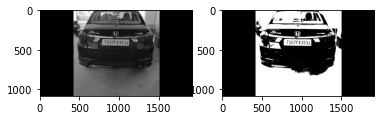

In [5]:
gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image, cmap="gray")
plt.show()

**Performing Connected Component Analysis of binary image**

**This gets all the connected regions and groups them together**

In [6]:
label_image = measure.label(binary_car_image)

**Setting the maximum width, height and minimum width and height that a license plate can be**

In [7]:
plate_dimensions = (0.03*label_image.shape[0], 0.08*label_image.shape[0], 0.15*label_image.shape[1], 0.3*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []

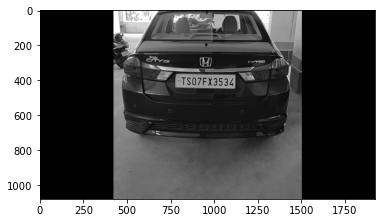

In [8]:
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")

**regionprops to create a list of properties of all the labelled regions**

In [9]:
flag =0
for region in regionprops(label_image):
    if region.area < 50:
        #if the region is so small then it's likely not a license plate
        continue
    min_row, min_col, max_row, max_col = region.bbox
    
    region_height = max_row - min_row
    region_width = max_col - min_col
    
    # ensuring that the region identified satisfies the condition of a typical license plate
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
        flag = 1
        plate_like_objects.append(binary_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                         max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rectBorder)
        # adding a red rectangle over those regions


In [10]:
if(flag == 1):
    plt.show()

**If the found region doesn't satisfy the criteria to be a license plate we try again**

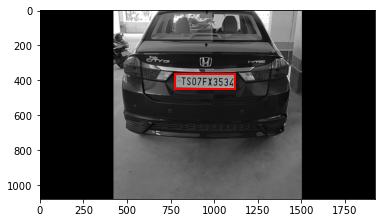

In [11]:
if(flag==0):
    min_height, max_height, min_width, max_width = plate_dimensions2
    plate_objects_cordinates = []
    plate_like_objects = []

    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray")

    # regionprops creates a list of properties of all the labelled regions
    for region in regionprops(label_image):
        if region.area < 50:
            #if the region is so small then it's likely not a license plate
            continue
        min_row, min_col, max_row, max_col = region.bbox

        region_height = max_row - min_row
        region_width = max_col - min_col

        # ensuring that the region identified satisfies the condition of a typical license plate
        if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
            plate_like_objects.append(binary_car_image[min_row:max_row,
                                      min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col,
                                             max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
            # drawing a red rectangle over those regions
    plt.show()
